# Linear regression 
## 1. Introduction

Linear regression is used when the response of variable is continuous. For instance, weight, height etc. The outcome (dependent variable) in linear regression is continuous. Hence it can have any number of possible values. The Linear regression normaly used for predictive analysis.

In this experiment, I want to predict the brain mass of mammal with knowing its body mass. I  downloaded the data from [here](http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html).

---

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data=np.loadtxt('../data/brainbody.txt', skiprows=1);
train,test=train_test_split(data, test_size=.1)

---

First, we should determine if there is any relationship between the variables.  A scatterplot or simple statistical analysis is useful to find the relationship between variables. If there is no correlation between variables linear regression will not give us a useful prediction.  

The correlation coefficient is a useful measure to find the degree of association between two variables. Correlation coefficient gives a value between 1 and -1 indicating the strength of relationship of the observed data.

---

In [3]:
cor=np.corrcoef(train[:,1],train[:,2])
print('Correlation coefficient:  %f'% cor[0,1])
info=stats.describe(data[:,1:3]);
#print(info)
print('Varince:  Brain-> %f   Body-> %f' % (info.variance[0],info.variance[1]))
X_train=np.log10(train[:,1])#brain weight
Y_train=np.log10(train[:,2])#body  weight

n=(X_train.shape[0]);
print("Number of sample %i"%n)
#print(X_train.dtype)

Correlation coefficient:  0.947864
Varince:  Brain-> 808485.127878   Body-> 865418.910402
Number of sample 55


----

The equation of linear regression is $Y = a + bX$, where $X$ is the **explanatory variable** and $Y$ is the **dependent variable**. The slope of the line is $b$, and $a$ is the intercept. 

----

In [4]:
learning_rate = .01
training_epochs = 1000
display_step = 50

X=tf.placeholder("float")
Y=tf.placeholder("float")

W=tf.Variable(np.random.randn(),name="weight")
b=tf.Variable(np.random.randn(),name="bias")

pred = tf.add(tf.multiply(X, W), b)
# Mean squared error

---

**Least-squares** is the most common method for fitting a regression. Least-squares estimate the best-fitting line to observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line.

----

In [5]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [6]:
#with tf.Session() as sess:
sess = tf.InteractiveSession()
sess.run(init)
for epoch in range(training_epochs):
        for (x, y) in zip(X_train, Y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: X_train, Y:Y_train})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

print "Optimization Finished!"
training_cost = sess.run(cost, feed_dict={X: X_train, Y: Y_train})
print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'



Epoch: 0050 cost= 0.709089160 W= -0.13596296 b= 1.5570316
Epoch: 0100 cost= 0.223045945 W= 0.32612824 b= 1.4520389
Epoch: 0150 cost= 0.116852768 W= 0.50709015 b= 1.3161596
Epoch: 0200 cost= 0.076129705 W= 0.59214556 b= 1.2029884
Epoch: 0250 cost= 0.057190761 W= 0.6395015 b= 1.118604
Epoch: 0300 cost= 0.048024166 W= 0.6690708 b= 1.0580943
Epoch: 0350 cost= 0.043556139 W= 0.68870384 b= 1.0153658
Epoch: 0400 cost= 0.041375611 W= 0.7021204 b= 0.9853783
Epoch: 0450 cost= 0.040311348 W= 0.71140707 b= 0.96438885
Epoch: 0500 cost= 0.039791875 W= 0.7178695 b= 0.9497116
Epoch: 0550 cost= 0.039538346 W= 0.7223795 b= 0.93945396
Epoch: 0600 cost= 0.039414611 W= 0.7255268 b= 0.93228436
Epoch: 0650 cost= 0.039354268 W= 0.7277251 b= 0.9272772
Epoch: 0700 cost= 0.039324813 W= 0.7292619 b= 0.9237765
Epoch: 0750 cost= 0.039310448 W= 0.7303349 b= 0.9213291
Epoch: 0800 cost= 0.039303459 W= 0.7310845 b= 0.9196227
Epoch: 0850 cost= 0.039300047 W= 0.7316097 b= 0.91842926
Epoch: 0900 cost= 0.039298397 W= 0.731

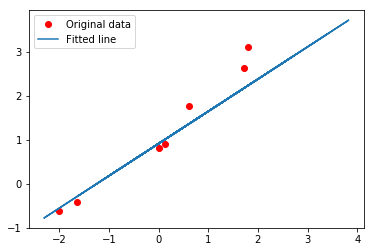

Predicted	Original
=========	==========
23.567867	58.000000
149.417222	440.000000
8.252851	6.600000
10.281627	8.100000
169.578621	1320.000000
0.520854	0.400000
0.282997	0.250000


In [7]:
#Graphic display
X_test=np.log10(test[:,1])
Y_test=np.log10(test[:,2])
plt.plot(X_test, Y_test, 'ro', label='Original data')
plt.plot(X_train, sess.run(W) * X_train+ sess.run(b), label='Fitted line')
plt.legend()
plt.show()
print("Predicted\tOriginal")
print("=========\t==========")
for (x,y) in zip(X_test, Y_test):
    print("%f\t%f"% (10**(sess.run(W) * x+ sess.run(b)), 10**y))

